In [1]:
import analysing_imaging_data as aid
import custom_plotting as cp
import custom_stats
import cell_counting_analysis as cca

import pandas as pd
from scipy import stats
import scikit_posthocs as sp
from statsmodels import formula
from statsmodels import api
import os


%load_ext autoreload
%autoreload 2

In [2]:
C0_imgs = cca.create_img_dict_from_folder(load_pattern="../Default_Watershed/C0/*.tiff")
C1_imgs = cca.create_img_dict_from_folder(load_pattern="../Default_Watershed/C1/*.tiff")

C1_lab_imgs = cca.create_labelled_img_dict_from_folder(load_pattern="./C1_label_imgs/*.tiff")

In [3]:
tidy_df = cca.num_div_denom_measure_region_props_to_tidy_df(
    num_img_dict=C1_imgs,
    denom_img_dict=C0_imgs,
    label_imgs=C1_lab_imgs,
)

In [4]:
my_pal = cp.define_pallette_tidy(tidy_df["sample_id"])

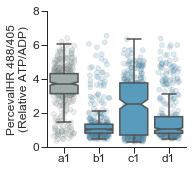

In [9]:
cp.tidy_create_strip_box_plot(
    ExpName= aid.exp_analysis_name(),
    x_figSize=cp.determine_fig_width_from_palette(my_pal),
    y_axis_limit=8,
    save_fig=False,
    data=tidy_df,
    y_label=cp.identify_y_axis_label(aid.exp_analysis_name()),
    x="sample_id",
    y="mean_intensity_num_div_denom",
    palette=my_pal,
)

In [10]:
custom_stats.kruskal_scipy_stats_tidy_df_wrapper(
    tidy_df=tidy_df, indep_var="sample_id", dep_var="mean_intensity_num_div_denom"
)

KruskalResult(statistic=368.7346519647326, pvalue=1.3084519023412949e-79)

In [11]:
sp.posthoc_dunn(
    tidy_df, val_col="mean_intensity_num_div_denom", group_col="sample_id", p_adjust="bonferroni"
)

,a1,b1,c1,d1
a1,-1.000000e+00,7.018929e-66,2.658235e-23,3.524175e-53
b1,7.018929e-66,-1.000000e+00,3.542270e-09,4.067860e-01
c1,2.658235e-23,3.542270e-09,-1.000000e+00,4.618334e-05
d1,3.524175e-53,4.067860e-01,4.618334e-05,-1.000000e+00


In [14]:
tidy_df_group = aid.grouped_tidy_data_summary_stats(
    tidy_df=tidy_df,
    group_col="image_key",
    agg_funcs=["mean", "median"],
    categories=tidy_df["sample_id"].cat.categories,
)

,a1,b1,c1,d1
a1,-1.000000,0.000033,0.031659,0.000234
b1,0.000033,-1.000000,0.031659,0.547564
c1,0.031659,0.031659,-1.000000,0.093123
d1,0.000234,0.547564,0.093123,-1.000000


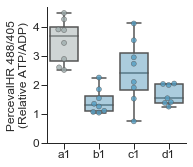

In [15]:
stat_type = "mean"

cp.tidy_create_swarm_box_plot(
    ExpName=aid.exp_analysis_name() + f"_{stat_type}",
    save_fig=True,
    data=tidy_df_group.query(f"summary_stat == '{stat_type}'"),
    y_label=cp.identify_y_axis_label(aid.exp_analysis_name()),
    x_figSize=cp.determine_fig_width_from_palette(my_pal),
    x="sample_id",
    y="mean_intensity_num_div_denom",
    palette=my_pal,
)

sp.posthoc_ttest(
    tidy_df_group.query(f"summary_stat == '{stat_type}'"),
    val_col="mean_intensity_num_div_denom",
    group_col="sample_id",
    pool_sd=True,
    p_adjust="holm-sidak",
)

,a1,b1,c1,d1
a1,-1.000000,0.000005,0.011596,0.000005
b1,0.000005,-1.000000,0.008036,0.865674
c1,0.011596,0.008036,-1.000000,0.008036
d1,0.000005,0.865674,0.008036,-1.000000


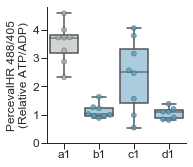

In [16]:
stat_type = "median"

cp.tidy_create_swarm_box_plot(
    ExpName=aid.exp_analysis_name() + f"_{stat_type}",
    save_fig=True,
    data=tidy_df_group.query(f"summary_stat == '{stat_type}'"),
    y_label=cp.identify_y_axis_label(aid.exp_analysis_name()),
    x_figSize=cp.determine_fig_width_from_palette(my_pal),
    x="sample_id",
    y="mean_intensity_num_div_denom",
    palette=my_pal,
)

sp.posthoc_ttest(
    tidy_df_group.query(f"summary_stat == '{stat_type}'"),
    val_col="mean_intensity_num_div_denom",
    group_col="sample_id",
    pool_sd=True,
    p_adjust="holm-sidak",
)

In [17]:
tidy_df.to_csv(f"{aid.exp_analysis_name()}_tidy.csv")
tidy_df_group.to_csv(f"{aid.exp_analysis_name()}_per_gut_tidy.csv")

In [18]:
if os.path.isfile("Tidy_Image_Analysis_Template_csv.ipynb"):
    os.rename(
        "Tidy_Image_Analysis_Template_csv.ipynb",
        f"{aid.exp_analysis_name()}_csv_tidy.ipynb",
    )